In [1]:
from qutip import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


E:\anaconda3\envs\vanilla2\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['shape', 'info', 'squeeze', 'identity']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [13]:


sm1 = tensor(destroy(2),qeye(2))
sm2 = tensor(qeye(2),destroy(2))


In [14]:
#Normal case

H = sm1.dag()*sm1 + sm2.dag()*sm2  + sm1 * sm2.dag()  + sm2 * sm1.dag()
c_ops = [sm1,sm2]

In [15]:
tlist = np.linspace(0,10,50)
psi0 = tensor(basis(2,1),basis(2,0))
meout = mesolve(H,psi0,tlist,c_ops)

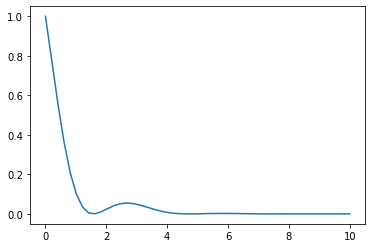

In [17]:

plt.plot(tlist,expect(meout.states,sm1.dag()*sm1))

plt.show()

In [20]:
#non-Hermitian case

H2 =  sm1.dag()*sm1 + sm2.dag()*sm2  + sm1 * sm2.dag()  + sm2 * sm1.dag() - 0.5j * sm1.dag()*sm1 - 0.5j * sm2.dag() * sm2
options = qutip.Options(normalize_output=False)

psi0 = tensor(basis(2,1),basis(2,0))
seout = mesolve(H2,psi0,tlist,[],[sm1.dag()*sm1],options=options)
#seout = mesolve(-1.0j*(spre(H2)-spost(H2).dag()),psi0,tlist,[],[sm1.dag()*sm1],options=options)
#seout = sesolve(H2,psi0,tlist,[sm1.dag()*sm1],options=options)



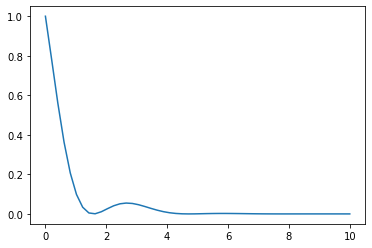

In [21]:
plt.plot(tlist,seout.expect[0])

plt.show()